In [1]:
!nvidia-smi

Fri Feb 10 06:19:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   28C    P0    35W / 250W |   3268MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  Off  | 00000000:D8:00.0 Off |                    0 |
| N/A   

In [2]:
!pip install torchvision==0.9.1
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.decomposition import PCA

In [2]:
train_on_gpu = torch.cuda.is_available()

In [3]:
nw = 0
bs = 64
vsize = 0.2

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

td = datasets.CIFAR10('data', train=True, download=True, transform=transform)
testd = datasets.CIFAR10('data', train=False, download=True, transform=transform)

tl = len(td)
i = list(range(tl))
np.random.shuffle(i)
split = int(np.floor(vsize * tl))
ti, vi = i[split:], i[:split]

training_data = SubsetRandomSampler(ti)
validation_data = SubsetRandomSampler(vi)

train_loader = torch.utils.data.DataLoader(td, batch_size=bs,
    sampler=training_data, num_workers=nw)
valid_loader = torch.utils.data.DataLoader(td, batch_size=bs, 
    sampler=validation_data, num_workers=nw)
test_loader = torch.utils.data.DataLoader(testd, batch_size=bs, 
    num_workers=nw)


classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
print('debug 2.....')


Files already downloaded and verified
Files already downloaded and verified
debug 2.....


In [57]:
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

    
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model6 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model7 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val

class Model8 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model9 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model10 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 10)

    def forward(self, val):
        val = val.view(-1, 32 * 32 * 3)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [60]:
def num_params(model):
    return sum(p.numel() for p in model.parameters())

In [59]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [55]:
training_losses = []
test_losses = []
param=[]
test_acc = []
train_acc=[]
def train_model(model):
    for epoch in range(20):
        running_loss = 0.0
        correct1 = 0
        total1 = 0
        model.train()
        
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total1 += labels.size(0)
            correct1 += (predicted == labels).sum().item()
            running_loss += loss.item()
        
        training_loss = running_loss / len(train_loader)
        accuracy1 = round( correct1 / total1,3)
    
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            
        test_loss /= len(test_loader)
        accuracy = round( correct / total,3)
    training_losses.append(training_loss)
    train_acc.append(accuracy1)
    test_losses.append(test_loss)
    test_acc.append(accuracy)
    param.append(num_params(model))
    print('Epoch: {} Training Loss: {:.4f} Test Loss: {:.4f}'.format(epoch, training_loss, test_loss))
    print('Epoch: {} Training acc: {:.4f} Test acc: {:.4f}'.format(epoch, accuracy1, accuracy))

In [61]:
model1 = Model1()
print("Model 1 parameters: ", (num_params(model1)))
if train_on_gpu:
  model1.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model1)

Model 1 parameters:  820874
Epoch: 19 Training Loss: 1.1886 Test Loss: 1.3488
Epoch: 19 Training acc: 0.5880 Test acc: 0.5280


In [62]:
model2 = Model2()
torch.manual_seed(1)
print("Model 2 parameters: ", (num_params(model2)))
if train_on_gpu:
  model2.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model2)

Model 2 parameters:  1707274
Epoch: 19 Training Loss: 1.1519 Test Loss: 1.3355
Epoch: 19 Training acc: 0.6030 Test acc: 0.5310


In [63]:
model3 = Model3()
torch.manual_seed(1)
print("Model 3 parameters: ", (num_params(model3)))
if train_on_gpu:
  model3.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model3)

Model 3 parameters:  1841162
Epoch: 19 Training Loss: 1.1453 Test Loss: 1.3288
Epoch: 19 Training acc: 0.6080 Test acc: 0.5330


In [64]:
model4 = Model4()
torch.manual_seed(1)
print("Model 4 parameters: ", (num_params(model4)))
if train_on_gpu:
  model4.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model4)

Model 4 parameters:  3676682
Epoch: 19 Training Loss: 1.1154 Test Loss: 1.3204
Epoch: 19 Training acc: 0.6170 Test acc: 0.5390


In [65]:
model5 = Model5()
torch.manual_seed(1)
print("Model 5 parameters: ", (num_params(model5)))
if train_on_gpu:
  model5.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model5.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model5)

Model 5 parameters:  402250
Epoch: 19 Training Loss: 1.2374 Test Loss: 1.3718
Epoch: 19 Training acc: 0.5710 Test acc: 0.5140


In [66]:
model6 = Model6()
torch.manual_seed(1)
print("Model 6 parameters: ", (num_params(model6)))
if train_on_gpu:
  model6.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model6.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model6)

Model 6 parameters:  411146
Epoch: 19 Training Loss: 1.2423 Test Loss: 1.3742
Epoch: 19 Training acc: 0.5700 Test acc: 0.5170


In [67]:
model7 = Model7()
torch.manual_seed(1)
print("Model 7 parameters: ", (num_params(model7)))
if train_on_gpu:
  model7.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model7.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model7)

Model 7 parameters:  3805450
Epoch: 19 Training Loss: 1.0995 Test Loss: 1.3425
Epoch: 19 Training acc: 0.6140 Test acc: 0.5290


In [68]:
model8 = Model8()
torch.manual_seed(1)
print("Model 8 parameters: ", (num_params(model8)))
if train_on_gpu:
  model8.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model8.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model8)

Model 8 parameters:  8401930
Epoch: 19 Training Loss: 1.0795 Test Loss: 1.3115
Epoch: 19 Training acc: 0.6330 Test acc: 0.5370


In [69]:
model9 = Model9()
torch.manual_seed(1)
print("Model 9 parameters: ", (num_params(model9)))
if train_on_gpu:
  model9.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model9.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model9)

Model 9 parameters:  20998154
Epoch: 19 Training Loss: 1.0382 Test Loss: 1.3044
Epoch: 19 Training acc: 0.6500 Test acc: 0.5420


In [70]:
model10 = Model10()
torch.manual_seed(1)
print("Model 10 parameters: ", (num_params(model10)))
if train_on_gpu:
  model10.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model10.parameters(), lr=0.001, weight_decay = 0.005, momentum = 0.9) 
train_model(model10)

Model 10 parameters:  20998154
Epoch: 19 Training Loss: 1.0382 Test Loss: 1.3044
Epoch: 19 Training acc: 0.6500 Test acc: 0.5420


10


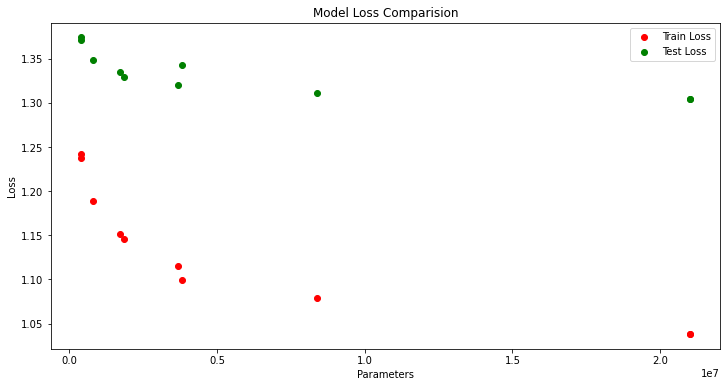

In [71]:
plt.figure(figsize=(12,6))
print(len(param))
plt.scatter(param, training_losses, color = "r")
plt.scatter(param, test_losses, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()

10


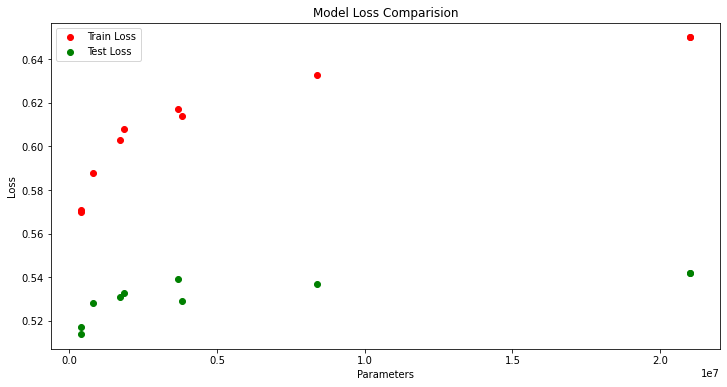

In [ ]:
plt.figure(figsize=(12,6))
print(len(param))
plt.scatter(param, train_acc, color = "r")
plt.scatter(param, test_acc, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()